<a href="https://colab.research.google.com/github/mam-7/CE888/blob/master/new_CE888/1907191_ASSIGN2_new1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
!python --version

Python 3.6.9


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = 'gdrive/My Drive/proj_ce888/'

In [ ]:
df=pd.read_csv(path+"parkinsons.data")

In [ ]:
#Step 1: Data Exploration and Visualization

In [ ]:
#what ranges do our data points lie in
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#any missing values 
df.isna().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [ ]:
#We check the types to ensure all columns are numeric or not
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
#do not need this for analysis
df= df.drop(["name"], axis=1)

In [ ]:
#check the counts of both 1 and 0 to notice any major imbalance issues etc
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

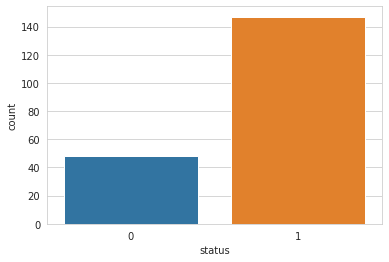

In [ ]:
#visualize counts
sns.set_style("whitegrid")
sns.countplot(x="status", data = df)

In [ ]:
features=df.loc[:,df.columns!='status']
labels=df.loc[:,'status']

Feature: 0, Score: -0.00238
Feature: 1, Score: -0.00012
Feature: 2, Score: -0.00154
Feature: 3, Score: -176.91321
Feature: 4, Score: -3321.63594
Feature: 5, Score: -759.21466
Feature: 6, Score: -36.13514
Feature: 7, Score: 360.58431
Feature: 8, Score: 27.44960
Feature: 9, Score: 0.57102
Feature: 10, Score: -871.24018
Feature: 11, Score: -26.39585
Feature: 12, Score: -3.07476
Feature: 13, Score: 283.74763
Feature: 14, Score: -2.52562
Feature: 15, Score: -0.01569
Feature: 16, Score: -1.01446
Feature: 17, Score: 0.35514
Feature: 18, Score: 0.12730
Feature: 19, Score: 1.26558
Feature: 20, Score: 0.04946
Feature: 21, Score: 1.26346


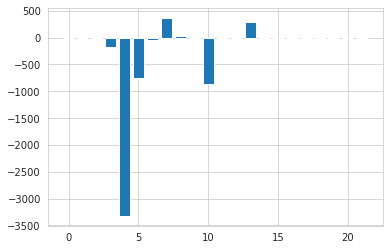

In [ ]:
#trying to find a way to rank the top important features for pairplot
# using linear regression model
model = LinearRegression()
# fit the model
model.fit(features, labels)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plots
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
#make separate dataframe of top features from prvious step
df_imp_features= df[['Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)', 'Shimmer:DDA', 'DFA',	'spread1',	'spread2',	'D2',	'PPE','status']].copy()

In [ ]:
#get features and labels again from the new dataframe
features1=df_imp_features.loc[:,df_imp_features.columns!='status']
labels1=df_imp_features.loc[:,'status']

In [ ]:
#visualize pairplot of the smaller dataframe previously obtained
sns.pairplot(df_imp_features, hue='status',height=10)

In [ ]:
#visualize pairplot of the original dataframe 
sns.pairplot(df, hue='status',height=10)

In [ ]:
#we scale our features to range -1 to 1 before performing pca 
mm_scaler = MinMaxScaler(feature_range=(-1,1))
X = mm_scaler.fit_transform(features) 
y = labels.values

In [ ]:
#separate dataframes for parkinsons and no parkinsons for data visualization purpose
df_parkinsons= df.loc[df['status']==1]
df_no_parkinsons= df.loc[df['status']==0]

In [ ]:
#perform train test split, stratify to maintain same balance as train in test set too, we do an 80/20 split of training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=10)

In [ ]:
#pca for dimensionality reduction
pca=PCA()
X_train_pca = pca.fit_transform(X_train)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-7.52183773e-02  6.81727360e-03 -9.03847495e-02  2.28259827e-01
   1.91415092e-01  2.07163818e-01  2.23378225e-01  2.07125381e-01
   2.66101586e-01  2.50242863e-01  2.93719040e-01  2.46744698e-01
   1.99272596e-01  2.93683996e-01  1.79950880e-01 -2.69103282e-01
   2.33297794e-01  4.18526179e-02  2.62981255e-01  1.75379756e-01
   1.62075774e-01  2.60689573e-01]
 [ 6.12898968e-01  2.57623608e-01  4.71865578e-01  7.93513725e-02
  -3.45583593e-02  9.40253913e-02  7.48569699e-02  9.40236318e-02
   8.78433799e-02  1.01079171e-01  9.73139692e-02  8.64236014e-02
   6.95379056e-02  9.72942137e-02  1.10074089e-01 -5.16605987e-02
  -2.98404838e-01 -2.61746812e-01 -1.69734450e-01 -1.15563059e-01
   1.53498284e-01 -1.31566041e-01]
 [ 1.54285702e-01  3.01353571e-01 -3.88234429e-01 -5.41938571e-02
  -6.04577682e-02 -5.11939010e-02 -1.03179890e-01 -5.11890587e-02
  -7.09287374e-02 -8.13796578e-02 -7.58136421e-02 -1.00599924e-01
  -5.15784900e-02 -7.58168763e-02  3.70855104e-02 -9.94798242e-02
   4.1

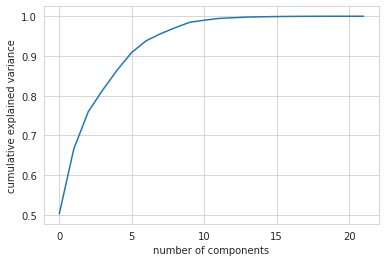

In [ ]:
#observe the scree plot for insight on ideal number of components
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

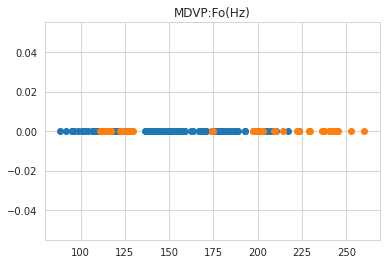

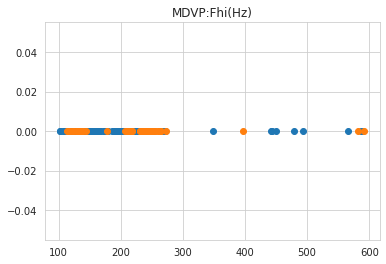

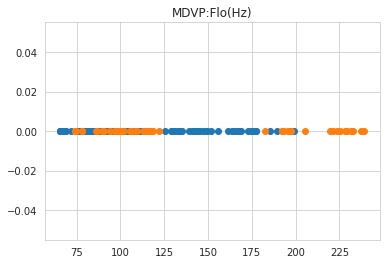

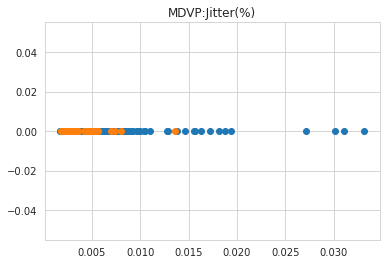

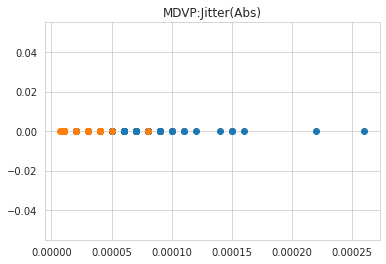

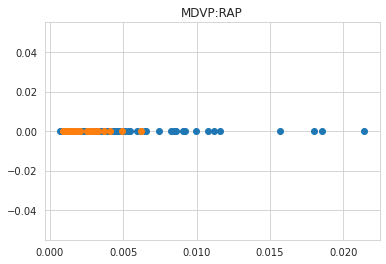

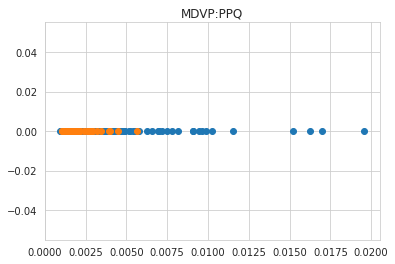

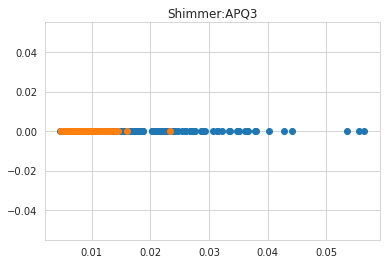

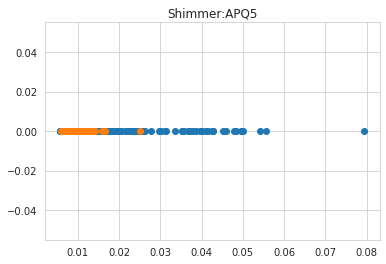

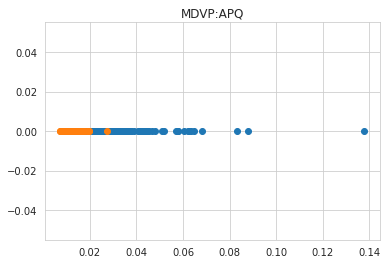

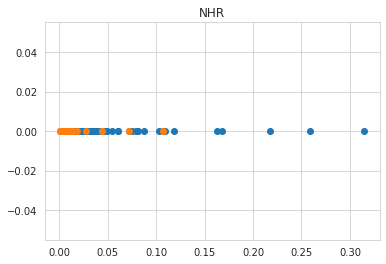

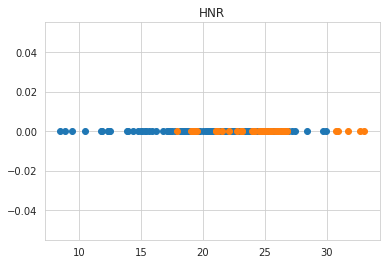

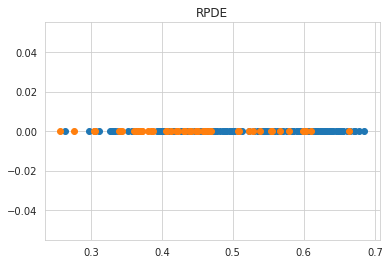

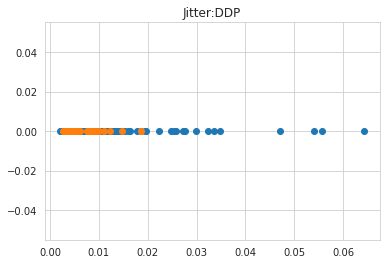

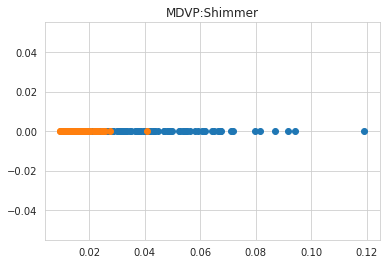

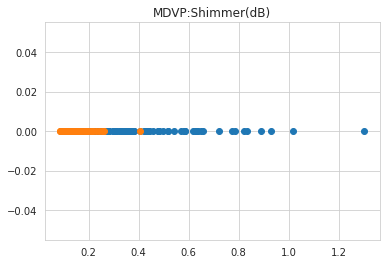

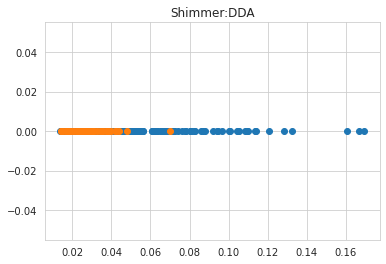

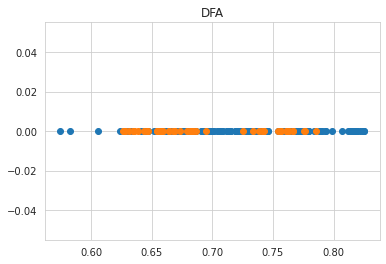

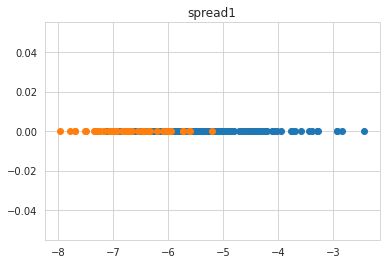

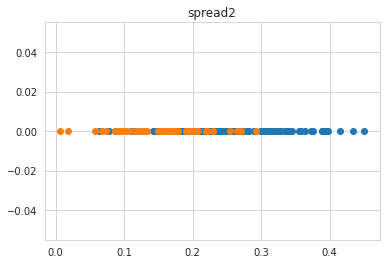

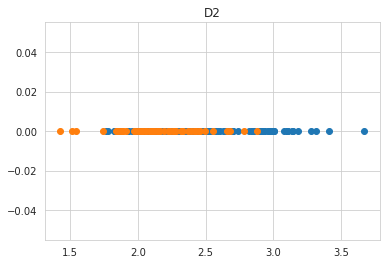

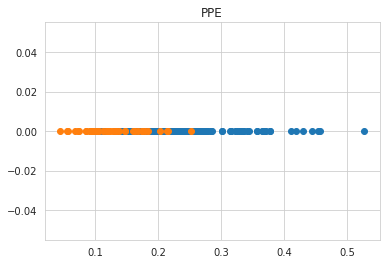

In [ ]:
#plot to observe whether any feature is useful for linearly separating the data
plt.plot(df_parkinsons['MDVP:Fo(Hz)'], np.zeros_like(df_parkinsons['MDVP:Fo(Hz)']),'o')
plt.plot(df_no_parkinsons['MDVP:Fo(Hz)'], np.zeros_like(df_no_parkinsons['MDVP:Fo(Hz)']),'o')
plt.title('MDVP:Fo(Hz)')
plt.show()
plt.plot(df_parkinsons['MDVP:Fhi(Hz)'], np.zeros_like(df_parkinsons['MDVP:Fhi(Hz)']),'o')
plt.plot(df_no_parkinsons['MDVP:Fhi(Hz)'], np.zeros_like(df_no_parkinsons['MDVP:Fhi(Hz)']),'o')
plt.title('MDVP:Fhi(Hz)')
plt.show()
plt.plot(df_parkinsons['MDVP:Flo(Hz)'], np.zeros_like(df_parkinsons['MDVP:Flo(Hz)']),'o')
plt.plot(df_no_parkinsons['MDVP:Flo(Hz)'], np.zeros_like(df_no_parkinsons['MDVP:Flo(Hz)']),'o')
plt.title('MDVP:Flo(Hz)')
plt.show()
plt.plot(df_parkinsons['MDVP:Jitter(%)'], np.zeros_like(df_parkinsons['MDVP:Jitter(%)']),'o')
plt.plot(df_no_parkinsons['MDVP:Jitter(%)'], np.zeros_like(df_no_parkinsons['MDVP:Jitter(%)']),'o')
plt.title('MDVP:Jitter(%)')
plt.show()
plt.plot(df_parkinsons['MDVP:Jitter(Abs)'], np.zeros_like(df_parkinsons['MDVP:Jitter(Abs)']),'o')
plt.plot(df_no_parkinsons['MDVP:Jitter(Abs)'], np.zeros_like(df_no_parkinsons['MDVP:Jitter(Abs)']),'o')
plt.title('MDVP:Jitter(Abs)')
plt.show()
plt.plot(df_parkinsons['MDVP:RAP'], np.zeros_like(df_parkinsons['MDVP:RAP']),'o')
plt.plot(df_no_parkinsons['MDVP:RAP'], np.zeros_like(df_no_parkinsons['MDVP:RAP']),'o')
plt.title('MDVP:RAP')
plt.show()
plt.plot(df_parkinsons['MDVP:PPQ'], np.zeros_like(df_parkinsons['MDVP:PPQ']),'o')
plt.plot(df_no_parkinsons['MDVP:PPQ'], np.zeros_like(df_no_parkinsons['MDVP:PPQ']),'o')
plt.title('MDVP:PPQ')
plt.show()
plt.plot(df_parkinsons['Shimmer:APQ3'], np.zeros_like(df_parkinsons['Shimmer:APQ3']),'o')
plt.plot(df_no_parkinsons['Shimmer:APQ3'], np.zeros_like(df_no_parkinsons['Shimmer:APQ3']),'o')
plt.title('Shimmer:APQ3')
plt.show()
plt.plot(df_parkinsons['Shimmer:APQ5'], np.zeros_like(df_parkinsons['Shimmer:APQ5']),'o')
plt.plot(df_no_parkinsons['Shimmer:APQ5'], np.zeros_like(df_no_parkinsons['Shimmer:APQ5']),'o')
plt.title('Shimmer:APQ5')
plt.show()
plt.plot(df_parkinsons['MDVP:APQ'], np.zeros_like(df_parkinsons['MDVP:APQ']),'o')
plt.plot(df_no_parkinsons['MDVP:APQ'], np.zeros_like(df_no_parkinsons['MDVP:APQ']),'o')
plt.title('MDVP:APQ')
plt.show()
plt.plot(df_parkinsons['NHR'], np.zeros_like(df_parkinsons['NHR']),'o')
plt.plot(df_no_parkinsons['NHR'], np.zeros_like(df_no_parkinsons['NHR']),'o')
plt.title('NHR')
plt.show()
plt.plot(df_parkinsons['HNR'], np.zeros_like(df_parkinsons['HNR']),'o')
plt.plot(df_no_parkinsons['HNR'], np.zeros_like(df_no_parkinsons['HNR']),'o')
plt.title('HNR')
plt.show()
plt.plot(df_parkinsons['RPDE'], np.zeros_like(df_parkinsons['RPDE']),'o')
plt.plot(df_no_parkinsons['RPDE'], np.zeros_like(df_no_parkinsons['RPDE']),'o')
plt.title('RPDE')
plt.show()
plt.plot(df_parkinsons['Jitter:DDP'], np.zeros_like(df_parkinsons['Jitter:DDP']),'o')
plt.plot(df_no_parkinsons['Jitter:DDP'], np.zeros_like(df_no_parkinsons['Jitter:DDP']),'o')
plt.title('Jitter:DDP')
plt.show()
plt.plot(df_parkinsons['MDVP:Shimmer'], np.zeros_like(df_parkinsons['MDVP:Shimmer']),'o')
plt.plot(df_no_parkinsons['MDVP:Shimmer'], np.zeros_like(df_no_parkinsons['MDVP:Shimmer']),'o')
plt.title('MDVP:Shimmer')
plt.show()
plt.plot(df_parkinsons['MDVP:Shimmer(dB)'], np.zeros_like(df_parkinsons['MDVP:Shimmer(dB)']),'o')
plt.plot(df_no_parkinsons['MDVP:Shimmer(dB)'], np.zeros_like(df_no_parkinsons['MDVP:Shimmer(dB)']),'o')
plt.title('MDVP:Shimmer(dB)')
plt.show()
plt.plot(df_parkinsons['Shimmer:DDA'], np.zeros_like(df_parkinsons['Shimmer:DDA']),'o')
plt.plot(df_no_parkinsons['Shimmer:DDA'], np.zeros_like(df_no_parkinsons['Shimmer:DDA']),'o')
plt.title('Shimmer:DDA')
plt.show()
plt.plot(df_parkinsons['DFA'], np.zeros_like(df_parkinsons['DFA']),'o')
plt.plot(df_no_parkinsons['DFA'], np.zeros_like(df_no_parkinsons['DFA']),'o')
plt.title('DFA')
plt.show()
plt.plot(df_parkinsons['spread1'], np.zeros_like(df_parkinsons['spread1']),'o')
plt.plot(df_no_parkinsons['spread1'], np.zeros_like(df_no_parkinsons['spread1']),'o')
plt.title('spread1')
plt.show()
plt.plot(df_parkinsons['spread2'], np.zeros_like(df_parkinsons['spread2']),'o')
plt.plot(df_no_parkinsons['spread2'], np.zeros_like(df_no_parkinsons['spread2']),'o')
plt.title('spread2')
plt.show()
plt.plot(df_parkinsons['D2'], np.zeros_like(df_parkinsons['D2']),'o')
plt.plot(df_no_parkinsons['D2'], np.zeros_like(df_no_parkinsons['D2']),'o')
plt.title('D2')
plt.show()
plt.plot(df_parkinsons['PPE'], np.zeros_like(df_parkinsons['PPE']),'o')
plt.plot(df_no_parkinsons['PPE'], np.zeros_like(df_no_parkinsons['PPE']),'o')
plt.title('PPE')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


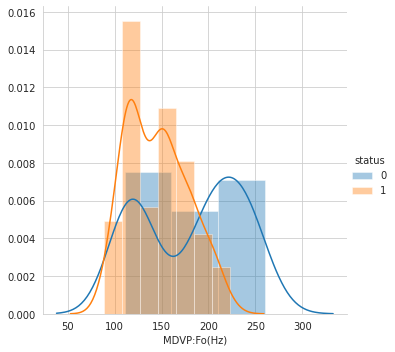

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


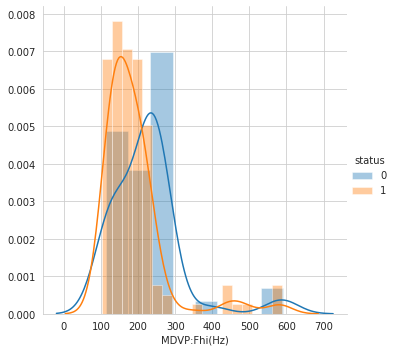

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


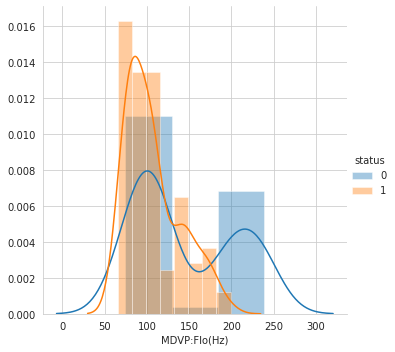

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


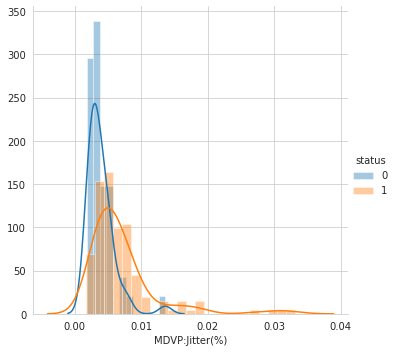

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


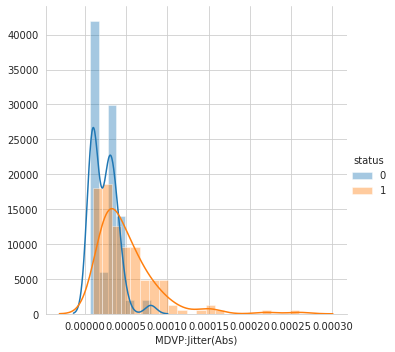

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


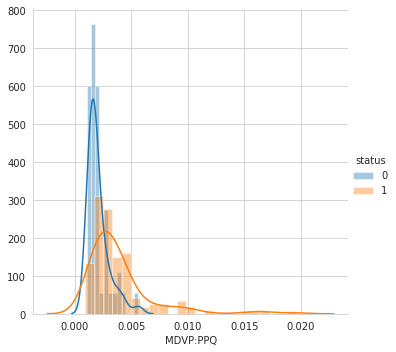

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


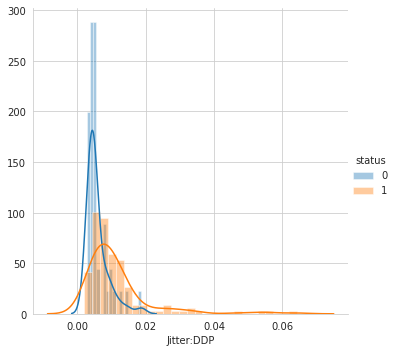

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


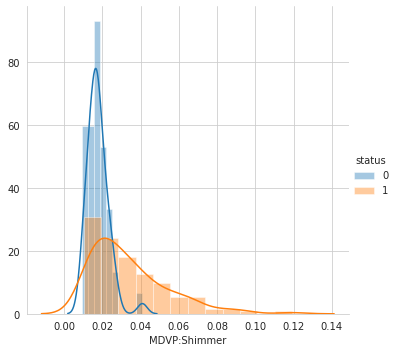

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


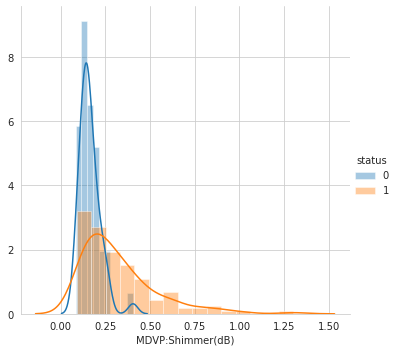

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


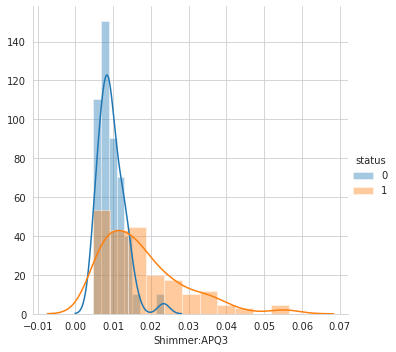

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


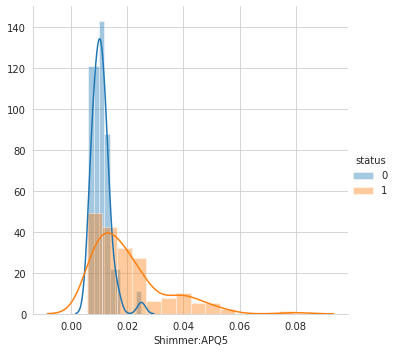

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


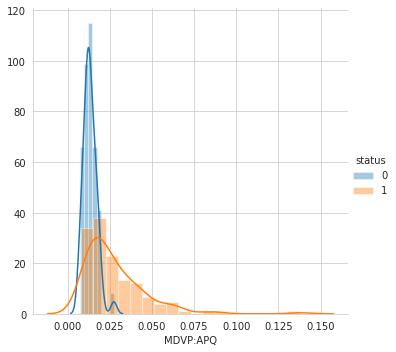

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


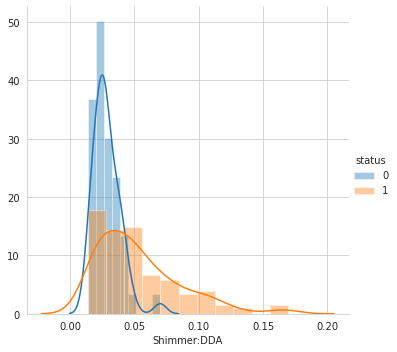

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


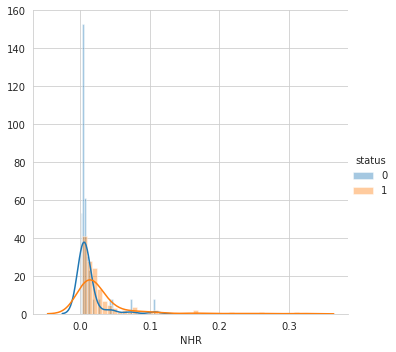

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


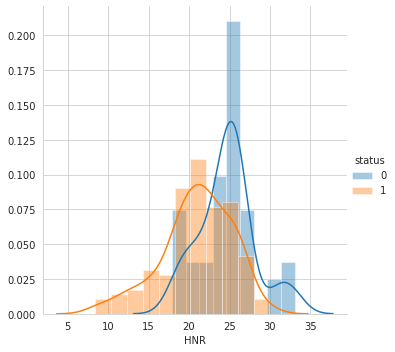

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


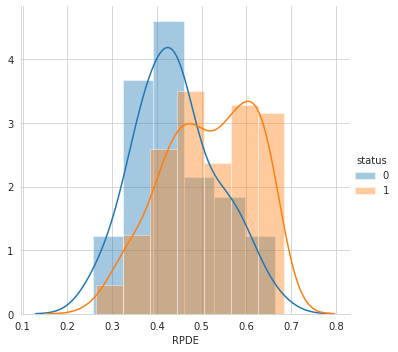

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


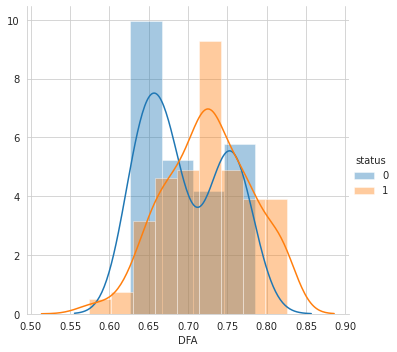

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


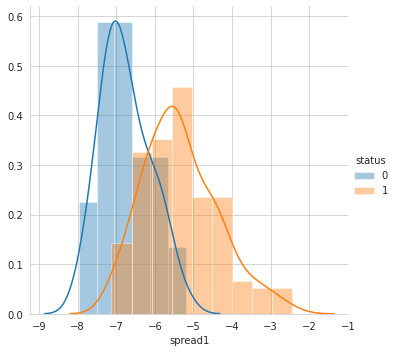

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


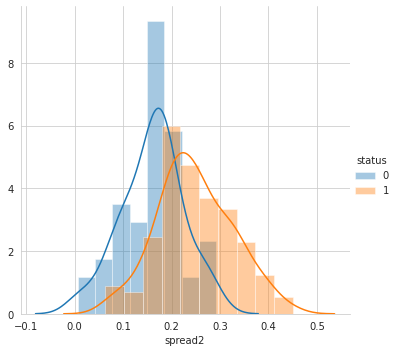

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


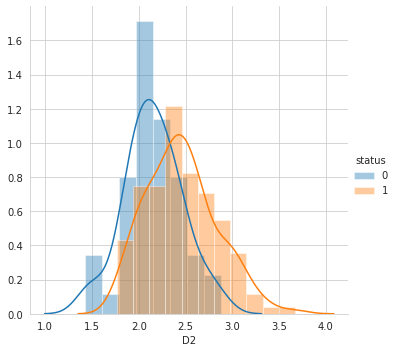

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


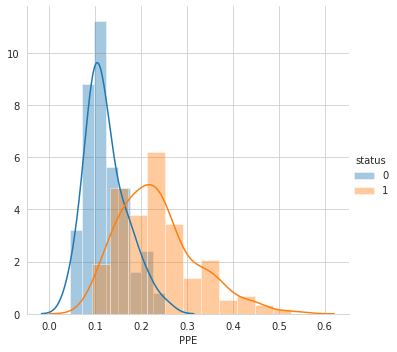

In [ ]:
	#observe the distribution of values and any difference between the 2 classes																		
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "MDVP:Fo(Hz)").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "MDVP:Fhi(Hz)").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "MDVP:Flo(Hz)").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "MDVP:Jitter(%)").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "MDVP:Jitter(Abs)").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "MDVP:PPQ").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "Jitter:DDP").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "MDVP:Shimmer").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "MDVP:Shimmer(dB)").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "Shimmer:APQ3").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "Shimmer:APQ5").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "MDVP:APQ").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "Shimmer:DDA").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "NHR").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "HNR").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "RPDE").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "DFA").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "spread1").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "spread2").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "D2").add_legend();
plt.show()
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "PPE").add_legend();
plt.show()

In [ ]:
#dataframe for correlation
df_corr=df.drop(['status'],1) 

In [ ]:
#correlation plot with only the important features found in previous step
df_imp_features.corr().style.background_gradient(cmap='coolwarm')

,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:DDA,DFA,spread1,spread2,D2,PPE,status
Jitter:DDP,1.000000,0.759555,0.790621,0.744901,0.064026,0.648328,0.324377,0.426556,0.671005,0.266646
MDVP:Shimmer,0.759555,1.000000,0.987258,0.987626,0.159954,0.654734,0.452025,0.507088,0.693771,0.367430
MDVP:Shimmer(dB),0.790621,0.987258,1.000000,0.963202,0.165157,0.652547,0.454314,0.512233,0.695058,0.350697
Shimmer:DDA,0.744901,0.987626,0.963202,1.000000,0.151132,0.610971,0.402223,0.467261,0.645389,0.347608
DFA,0.064026,0.159954,0.165157,0.151132,1.000000,0.195668,0.166548,-0.165381,0.270445,0.231739
spread1,0.648328,0.654734,0.652547,0.610971,0.195668,1.000000,0.652358,0.495123,0.962435,0.564838
spread2,0.324377,0.452025,0.454314,0.402223,0.166548,0.652358,1.000000,0.523532,0.644711,0.454842
D2,0.426556,0.507088,0.512233,0.467261,-0.165381,0.495123,0.523532,1.000000,0.480585,0.340232
PPE,0.671005,0.693771,0.695058,0.645389,0.270445,0.962435,0.644711,0.480585,1.000000,0.531039
status,0.266646,0.367430,0.350697,0.347608,0.231739,0.564838,0.454842,0.340232,0.531039,1.000000


In [ ]:
#correalation plot with all the features
df_corr.corr().style.background_gradient(cmap='coolwarm')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [ ]:
# correlation coefficient values in each attributes.
correlation_values=df.corr()['status']
correlation_values.abs().sort_values(ascending=True)

MDVP:Fhi(Hz)        0.166136
NHR                 0.189429
DFA                 0.231739
Jitter:DDP          0.266646
MDVP:RAP            0.266668
MDVP:Jitter(%)      0.278220
MDVP:PPQ            0.288698
RPDE                0.308567
MDVP:Jitter(Abs)    0.338653
D2                  0.340232
Shimmer:DDA         0.347608
Shimmer:APQ3        0.347617
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ5        0.351148
HNR                 0.361515
MDVP:APQ            0.364316
MDVP:Shimmer        0.367430
MDVP:Flo(Hz)        0.380200
MDVP:Fo(Hz)         0.383535
spread2             0.454842
PPE                 0.531039
spread1             0.564838
status              1.000000
Name: status, dtype: float64

In [ ]:
#create pca train and test sets
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Task 6: Apply Logistic Regression on training features and predict test features

lr = LogisticRegression()

lr = lr.fit(X=X_train_pca,y=y_train) # Train a Logistic regression model
pred_lab=lr.predict(X_test_pca) # Test on the test data
print("Logistic regression (pca) accuracy")
print(100 * accuracy_score(y_test, pred_lab))

lr = lr.fit(X=X_train,y=y_train) # Train a Logistic regression model
pred_lab=lr.predict(X_test) # Test on the test data
print("Logistic regression accuracy")
print(100 * accuracy_score(y_test, pred_lab))

Logistic regression (pca) accuracy
84.61538461538461
Logistic regression accuracy
84.61538461538461


In [ ]:
confusion_matrix(y_test, pred_lab)

array([[ 7,  3],
       [ 3, 26]])

In [ ]:
# Apply KNN on training features and predict test features

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_pca, y_train)
predictions = knn_clf.predict(X_test_pca)
print("KNN (pca) accuracy")
print(accuracy_score(y_test, predictions)*100)

knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)
print("KNN accuracy")
print(accuracy_score(y_test, predictions)*100)


KNN (pca) accuracy
92.3076923076923
KNN accuracy
89.74358974358975


In [ ]:
#Tune KNN Hyperparameters
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_clf2 = KNeighborsClassifier()
#Use GridSearch
knn_clf_2 = GridSearchCV(knn_clf2, hyperparameters, cv=10)
#Fit the model
best_model = knn_clf_2.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


In [ ]:
#Try again with new hyperparameters
knn_clf_new = KNeighborsClassifier(n_neighbors=1, p=2, leaf_size=1)

knn_clf_new.fit(X_train, y_train)
predictions = knn_clf_new.predict(X_test)
print("KNN accuracy")
print(accuracy_score(y_test, predictions)*100)

knn_clf_new.fit(X_train_pca, y_train)
predictions = knn_clf_new.predict(X_test_pca)
print("KNN (pca) accuracy")
print(accuracy_score(y_test, predictions)*100)


In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
#Apply XGB Classifier on training features and predict test features
xgb_model = XGBClassifier()

xgb_model.fit(X_train_pca, y_train)
y_pred = xgb_model.predict(X_test_pca)
print("XGB (pca) accuracy")
print(100* accuracy_score(y_test, y_pred))

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("XGB accuracy")
print(100* accuracy_score(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
#THE END